In [25]:
import pandas as pd
import numpy as np

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [26]:
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv('winequality-red.csv',sep=';')

1.Оцените качество по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [27]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
y = data['quality']
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [29]:
X = data.drop('quality',axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [30]:
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

In [31]:
RANDOM_STATE = 42

clf_DTC = DecisionTreeClassifier().fit(X,y)
y_pred_DTC = clf_DTC.predict(X)
print("Accuracy_DTC:",metrics.accuracy_score(y, y_pred_DTC))
clf = DecisionTreeClassifier()
print('DTC: ', cross_val_score(clf, X, y, cv=3, scoring='accuracy').mean())

clf_BC = BaggingClassifier(base_estimator=SVC(), n_estimators=100, random_state=RANDOM_STATE).fit(X, y)
y_pred_BC = clf_BC.predict(X)
print("Accuracy_BC:",metrics.accuracy_score(y, y_pred_BC))
clf = BaggingClassifier(n_estimators=100)
print('BC: ', cross_val_score(clf, X, y, cv=3, scoring='accuracy').mean())

clf_RFC = RandomForestClassifier(max_depth=100, random_state=RANDOM_STATE).fit(X, y)
y_pred_RFC = clf_RFC.predict(X)
print("Accuracy_RFC:",metrics.accuracy_score(y, y_pred_RFC))
clf = RandomForestClassifier(n_estimators=100)
print('RFC: ', cross_val_score(clf, X, y, cv=3, scoring='accuracy').mean())


Accuracy_DTC: 1.0
DTC:  0.4534083802376485
Accuracy_BC: 0.5103189493433395
BC:  0.564102564102564
Accuracy_RFC: 1.0
RFC:  0.5603502188868043


2.Разделите выборку на обучающую и тестовую в отношении 70%/30%

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE) 

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



In [33]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
trees = [10, 50, 100] + [i for i in range(200,5001,200)]
scores = []

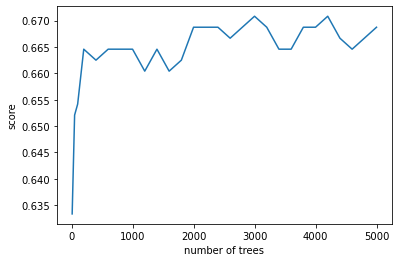

In [34]:
n_estimators = [10, 50, 100] + list(range(200, 5200, 200))
scores = []
for n_est in n_estimators:
    clf = RandomForestClassifier(n_estimators=n_est, random_state=RANDOM_STATE).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(clf.score(X_test, y_test))

plt.plot(n_estimators, scores)
plt.xlabel('number of trees')
plt.ylabel('score')
plt.show()

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

X, y = data.iloc[:,:-1], data.iloc[:,-1]
y = y-min(y)
clfs = [('sklearn GB',GradientBoostingClassifier()),
        ('xgboost GB', XGBClassifier())]
for name, clf in clfs:
     cross_val_sc = cross_val_score(clf, X, y, scoring='accuracy', cv=10).mean()
     print(f'model:{name}, score: {cross_val_sc}')

model:sklearn GB, score: 0.5640762578616352
model:xgboost GB, score: 0.5547091194968552


5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy и скорость работы. Выведите лучшие параметры алгоритмов.

In [36]:
from sklearn.model_selection import GridSearchCV

learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
n_estimators = [10, 20, 30, 40, 50]
max_depth =  [2, 3, 4, 5]
models = [
    (
        'sklearn GB',
         GradientBoostingClassifier,
         [{
            'loss':['deviance'],
            'learning_rate': learning_rate,
            'n_estimators': n_estimators, 
            'max_depth': max_depth
         }]
    ),
    (
        'xgboost',
        XGBClassifier,
        [{
            'objective': ['multi:softprob'],
            'eval_metric': ['mlogloss', 'mae'],
            'learning_rate': learning_rate,
            'n_estimators': n_estimators,  
            'max_depth': max_depth
        }]
    )
    
]

for name, model, param in models:
    %time search = GridSearchCV(model(), param_grid=param, scoring='accuracy', cv=3).fit(X, y)
    print(f'model:{name}, opt_params:{search.best_params_}, score:{search.best_score_}')


Wall time: 5min 53s
model:sklearn GB, opt_params:{'learning_rate': 0.3, 'loss': 'deviance', 'max_depth': 2, 'n_estimators': 10}, score:0.5678549093183239
Wall time: 2min 9s
model:xgboost, opt_params:{'eval_metric': 'mlogloss', 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 20, 'objective': 'multi:softprob'}, score:0.5859912445278299


6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [37]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

clfs = [('sklearn GB', GradientBoostingClassifier()),
       ('xgboost GB', XGBClassifier()), 
        ('lightgbm GB', LGBMClassifier()),
        ('catboost GB', CatBoostClassifier(verbose=False))]
for name, clf in clfs:
    %time score = cross_val_score(clf, X, y, scoring="accuracy", cv=3).mean()
    print(f'{name}: {score}')

Wall time: 5.54 s
sklearn GB: 0.539712320200125
Wall time: 1.3 s
xgboost GB: 0.5284552845528455
Wall time: 1.39 s
lightgbm GB: 0.5284552845528455
Wall time: 25.1 s
catboost GB: 0.5328330206378987


7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями. Выведите лучшие параметры алгоритмов.
Сравните значение метрики accuracy и скорость по этим четырем реализациям.

In [38]:
learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
n_estimators = [10, 20, 30, 40, 50]
max_depth =  [2, 3, 4, 5]
models = [
    (
        'lightgbm GB',
         LGBMClassifier(),
         [{
            'objective':['multi:softprob'],
            'learning_rate': learning_rate,
            'n_estimators': n_estimators, 
            'max_depth': max_depth
         }]
    ),
    (
        'catboost GB',
        CatBoostClassifier(verbose=False),
        [{
            'loss_function': ['MultiClass'],
            'eval_metric': ['MultiClass'],
            'learning_rate': learning_rate,
            'n_estimators': n_estimators,  
            'max_depth': max_depth
        }]
    )
    
]

for name, model, param in models:
    %time search = GridSearchCV(model, param_grid=param, scoring='accuracy', cv=3).fit(X, y)
    print(f'model:{name}, opt_params:{search.best_params_}, score:{search.best_score_}')

Wall time: 28.6 s
model:lightgbm GB, opt_params:{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 20, 'objective': 'multi:softprob'}, score:0.5716072545340838
Wall time: 1min 27s
model:catboost GB, opt_params:{'eval_metric': 'MultiClass', 'learning_rate': 0.1, 'loss_function': 'MultiClass', 'max_depth': 4, 'n_estimators': 40}, score:0.5934959349593497


8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [hyperopt](https://github.com/hyperopt/hyperopt) . Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [39]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


def hyperopt_xgb_score(params):
    clf = XGBClassifier(**params)
    current_score = cross_val_score(clf, X, y, cv=3).mean()
    return -current_score

space_xgb = {
            'n_estimators': hp.choice('n_estimators',     range(1, 51, 1)),
            'learning_rate':hp.uniform('learning_rate',0.1, 0.91),
            'max_depth':    hp.choice('max_depth',        range(1, 51, 1)),
        }

print(fmin(fn=hyperopt_xgb_score, space=space_xgb, algo=tpe.suggest, max_evals=10))

param = [{
            'loss':['deviance'],
            'learning_rate': [0.1],
            'n_estimators': [30], 
            'max_depth': [2]
         }]
%time search = GridSearchCV(GradientBoostingClassifier(), param_grid=param, scoring='accuracy', cv=3).fit(X, y)

print(f'model:{name}, opt_params:{search.best_params_}, score:{search.best_score_}')
# HyperOpt параметры показывают более точные(меньшие) значения, требуется дополнительная проверка выданных параметров

100%|██████████| 10/10 [00:05<00:00,  1.72trial/s, best loss: -0.5484677923702314]
{'learning_rate': 0.10941341233950388, 'max_depth': 33, 'n_estimators': 23}
Wall time: 1.85 s
model:catboost GB, opt_params:{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 2, 'n_estimators': 30}, score:0.5703564727954972


In [40]:
# from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
# from functools import partial
# from sklearn.pipeline import Pipeline

# search_space = {
#                 'clf__learning_rate' : hp.loguniform(label='learning_rate', low=np.log(0.04), high=np.log(0.5)),
#                 'clf__n_estimators' :  hp.choice(label='n_estimators', options=np.arange(1, 100, 10, dtype=int)),
#                 'clf__max_depth':  hp.choice(label='max_depth', options=np.arange(2, 10, 1, dtype=int))
#                 }

# clfs = [('sklearn GB',GradientBoostingClassifier(loss='deviance')),
#         ('xgboost GB', XGBClassifier(objective ='multi:softprob', eval_metric= 'mlogloss')),
#         ('lightgbm GB', LGBMClassifier(objective ='multi:softprob')),
#         ('catboost GB',CatBoostClassifier(loss_function ='MultiClass', eval_metric='MultiClass', verbose=False))
#        ]

# def objective(params, pipeline,  X_train, y_train):
#     pipeline.set_params(**params)
#     score = cross_val_score(estimator=pipeline, X=X_train, y=y_train, 
#                             scoring='accuracy', cv=3)
#     return   {'loss': -score.mean(), 'params': params, 'status': STATUS_OK}

# for name, clf in clfs:
#     print(name, clf)
#     pipeline = Pipeline([('clf', clf)])
#     trials = Trials()
#     best = fmin( 
#                 fn=partial(objective, pipeline=pipeline, X_train=X, y_train=y),
#                 space=search_space,
#                 algo=tpe.suggest,
#                 max_evals=40,
#                 trials=trials,
#                 show_progressbar=True
#             )
#     print(f'{name}: {best}')

9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [44]:
from sklearn.ensemble import StackingClassifier
estimators = [('sklearn GB', GradientBoostingClassifier()),
       ('xgboost GB', XGBClassifier()), 
        ('lightgbm GB', LGBMClassifier()),
        ('catboost GB', CatBoostClassifier(verbose=False))]

clf_Stack = StackingClassifier(estimators=estimators) #, n_jobs=-1,verbose='False')

clf_Stack.fit(X_train, y_train)
print(clf_Stack.score(X_test, y_test))

0.6729166666666667


10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [46]:
estimators = [('sklearn GB', 
               GradientBoostingClassifier(
                   loss='deviance',
                   learning_rate = 0.1,
                   n_estimators = 30, 
                   max_depth = 2
               )),
       ('xgboost GB', 
        XGBClassifier(
            objective ='multi:softprob',
            eval_metric= 'mlogloss',
            learning_rate= 0.1,
            n_estimators = 20,  
            max_depth = 4
        
        )), 
        ('lightgbm GB', 
         LGBMClassifier(
             objective= 'multi:softprob',
            learning_rate=0.1,
            n_estimators=25, 
            max_depth=2
         )),
        ('catboost GB',
         CatBoostClassifier(
            loss_function= 'MultiClass',
            eval_metric='MultiClass',
            learning_rate = 0.3,
            n_estimators= 30,  
            max_depth= 2,
            verbose=False))]

clf = StackingClassifier(estimators=estimators)
cross_val_sc = cross_val_score(clf, X, y, scoring='accuracy', cv=3).mean()
print(f'StackingClassifier: score: {cross_val_sc}')

# точность увеличивается

StackingClassifier: score: 0.5897435897435898
